<a href="https://colab.research.google.com/github/fajrulsantoso/Pcvk_2025-2026/blob/main/%E2%80%9CWeek3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving unnamed.jpg to unnamed.jpg


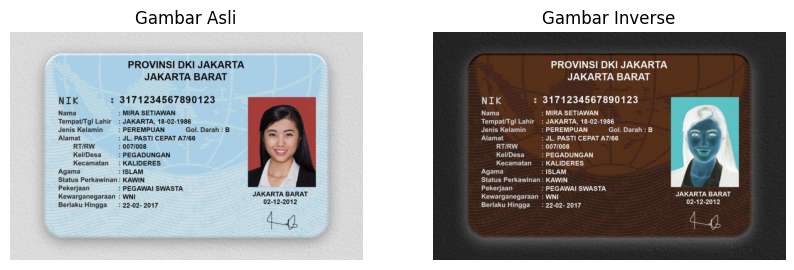

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Mengunggah gambar dari komputer lokal ke Colab
from google.colab import files
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

# Membaca gambar
img = cv2.imread(image_name)

# Mengubah gambar ke format RGB untuk ditampilkan dengan Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mengimplementasikan inverse citra
img_inverse = 255 - img_rgb

# Menampilkan gambar asli dan hasil inverse
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_rgb)
axes[0].set_title('Gambar Asli')
axes[0].axis('off')

axes[1].imshow(img_inverse)
axes[1].set_title('Gambar Inverse')
axes[1].axis('off')

plt.show()